In [1]:
import time
import datetime
import pandas as pd
import numpy as np
from scipy import stats
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from googletrans import Translator
import googletrans

In [2]:
countries_list = {
    #top 10 by corona cases
    'italy': {'code': 'IT', 'lang': 'it', 'eu': 'IT'},
    'china': {'code': 'CN', 'lang': 'zh-cn', 'eu': 'CN'},
    'spain': {'code': 'ES', 'lang': 'es', 'eu': 'ES'},
    'iran': {'code': 'IR', 'lang': 'fa', 'eu': 'IR'},
    'france': {'code': 'FR', 'lang': 'fr', 'eu': 'FR'},
    'usa': {'code': 'US', 'lang': 'en', 'eu': 'US'},
    'uk': {'code': 'GB', 'lang': 'en', 'eu': 'UK'},
    'netherlands': {'code': 'NL', 'lang': 'nl', 'eu': 'NL'},
    'south korea': {'code': 'KR', 'lang': 'ko', 'eu': 'KR'},
    'germany': {'code': 'DE', 'lang': 'de', 'eu': 'DE'},
    'switzerland': {'code': 'CH', 'lang': 'de', 'eu': 'CH'},
    'belgium': {'code': 'BE', 'lang': 'nl', 'eu': 'BE'},
    'austria': {'code': 'AT', 'lang': 'de', 'eu': 'AT'},
    'canada': {'code': 'CA', 'lang': 'en', 'eu': 'CA'},
    'norway': {'code': 'NO', 'lang': 'no', 'eu': 'NO'},
    'portgual': {'code': 'PT', 'lang': 'pt', 'eu': 'PT'},
    'sweden': {'code': 'SE', 'lang': 'sv', 'eu': 'SE'},
    'israel': {'code': 'IL', 'lang': 'iw', 'eu': 'IL'},
    'malaysia': {'code': 'MY', 'lang': 'ms', 'eu': 'MY'},
    'denmark': {'code': 'DK', 'lang': 'da', 'eu': 'DK'},
    #All other countries with large populations outside above list
    'australia': {'code': 'AU', 'lang': 'en', 'eu': 'AU'},
    'india': {'code': 'IN', 'lang': 'en', 'eu': 'IN'},
    'mexico': {'code': 'MX', 'lang': 'es', 'eu': 'MX'},
    'russia': {'code': 'RU', 'lang': 'ru', 'eu': 'RU'},
    'nigeria': {'code': 'NG', 'lang': 'en', 'eu': 'NG'},
    'indonesia': {'code': 'ID', 'lang': 'id', 'eu': 'ID'},
    'brazil': {'code': 'BR', 'lang': 'pt', 'eu': 'BR'},
    'pakistan': {'code': 'PK', 'lang': 'en', 'eu': 'PK'},
    #Unclear what language is spoken in hospital setting
    #'bangladesh': {'code': 'bd', 'lang': 'bn'},
    'japan': {'code': 'JP', 'lang': 'ja', 'eu': 'JP'},
    'philipines': {'code': 'PH', 'lang': 'tl', 'eu': 'PH'},
    #No result for am or en in trends
    #'ehtiopia': {'code': 'ET', 'lang': 'am'},
    'egypt': {'code': 'EG', 'lang': 'ar', 'eu': 'EG'},
    'vietnam': {'code': 'VN', 'lang': 'vi', 'eu': 'VN'},
    'turkey': {'code': 'TR', 'lang': 'tr', 'eu': 'TR'},
    'dem rep congo': {'code': 'CD', 'lang': 'fr', 'eu': 'CD'},
    'thailand': {'code': 'TH', 'lang': 'th', 'eu': 'TH'},
    'south africa': {'code': 'ZA', 'lang': 'en', 'eu': 'ZA'}
}

In [3]:
#Translate anosmia into local langaues based on above mappings
translator = Translator()

def add_trans(countries):
    result = countries
    counter = 0
    for c in result:
        lang = result[c]['lang']
        trans = translator.translate('anosmia', src='en', dest=lang).text
        result[c]['translation'] = trans
        #Prevents daily rate limit resulting in 24hr ban from api
        time.sleep(7)
        counter += 1
        print(counter, " / ", len(result))
    return result

In [4]:
#Uncomment to refresh translations and comment out hardcoded version below
#current_translated = add_trans(countries_list)
current_translated = {'italy': {'code': 'IT', 'lang': 'it', 'eu': 'IT', 'translation': 'anosmia'}, 'china': {'code': 'CN', 'lang': 'zh-cn', 'eu': 'CN', 'translation': '嗅觉丧失症'}, 'spain': {'code': 'ES', 'lang': 'es', 'eu': 'ES', 'translation': 'anosmia'}, 'iran': {'code': 'IR', 'lang': 'fa', 'eu': 'IR', 'translation': 'نابویایی'}, 'france': {'code': 'FR', 'lang': 'fr', 'eu': 'FR', 'translation': 'anosmie'}, 'usa': {'code': 'US', 'lang': 'en', 'eu': 'US', 'translation': 'anosmia'}, 'uk': {'code': 'GB', 'lang': 'en', 'eu': 'UK', 'translation': 'anosmia'}, 'netherlands': {'code': 'NL', 'lang': 'nl', 'eu': 'NL', 'translation': 'anosmie'}, 'south korea': {'code': 'KR', 'lang': 'ko', 'eu': 'KR', 'translation': '후각 상실증'}, 'germany': {'code': 'DE', 'lang': 'de', 'eu': 'DE', 'translation': 'Anosmie'}, 'switzerland': {'code': 'CH', 'lang': 'de', 'eu': 'CH', 'translation': 'Anosmie'}, 'belgium': {'code': 'BE', 'lang': 'nl', 'eu': 'BE', 'translation': 'anosmie'}, 'austria': {'code': 'AT', 'lang': 'de', 'eu': 'AT', 'translation': 'Anosmie'}, 'canada': {'code': 'CA', 'lang': 'en', 'eu': 'CA', 'translation': 'anosmia'}, 'norway': {'code': 'NO', 'lang': 'no', 'eu': 'NO', 'translation': 'anosmi'}, 'portgual': {'code': 'PT', 'lang': 'pt', 'eu': 'PT', 'translation': 'anosmia'}, 'sweden': {'code': 'SE', 'lang': 'sv', 'eu': 'SE', 'translation': 'anosmi'}, 'israel': {'code': 'IL', 'lang': 'iw', 'eu': 'IL', 'translation': 'תַתרָנוּת'}, 'malaysia': {'code': 'MY', 'lang': 'ms', 'eu': 'MY', 'translation': 'anosmia'}, 'denmark': {'code': 'DK', 'lang': 'da', 'eu': 'DK', 'translation': 'anosmi'}, 'australia': {'code': 'AU', 'lang': 'en', 'eu': 'AU', 'translation': 'anosmia'}, 'india': {'code': 'IN', 'lang': 'en', 'eu': 'IN', 'translation': 'anosmia'}, 'mexico': {'code': 'MX', 'lang': 'es', 'eu': 'MX', 'translation': 'anosmia'}, 'russia': {'code': 'RU', 'lang': 'ru', 'eu': 'RU', 'translation': 'аносмия'}, 'nigeria': {'code': 'NG', 'lang': 'en', 'eu': 'NG', 'translation': 'anosmia'}, 'indonesia': {'code': 'ID', 'lang': 'id', 'eu': 'ID', 'translation': 'keadaan kekurangan penciuman'}, 'brazil': {'code': 'BR', 'lang': 'pt', 'eu': 'BR', 'translation': 'anosmia'}, 'pakistan': {'code': 'PK', 'lang': 'en', 'eu': 'PK', 'translation': 'anosmia'}, 'japan': {'code': 'JP', 'lang': 'ja', 'eu': 'JP', 'translation': '嗅覚消失'}, 'philipines': {'code': 'PH', 'lang': 'tl', 'eu': 'PH', 'translation': 'pagkawala ng pang-amoy'}, 'egypt': {'code': 'EG', 'lang': 'ar', 'eu': 'EG', 'translation': 'فقد حاسة الشم'}, 'vietnam': {'code': 'VN', 'lang': 'vi', 'eu': 'VN', 'translation': 'bịnh giãm khứu giác'}, 'turkey': {'code': 'TR', 'lang': 'tr', 'eu': 'TR', 'translation': 'anozmi'}, 'dem rep congo': {'code': 'CD', 'lang': 'fr', 'eu': 'CD', 'translation': 'anosmie'}, 'thailand': {'code': 'TH', 'lang': 'th', 'eu': 'TH', 'translation': 'รู้กลิ่น'}, 'south africa': {'code': 'ZA', 'lang': 'en', 'eu': 'ZA', 'translation': 'anosmia'}}

In [5]:
#Fiddle with timeout if Google rate limit or ban from trends API
pytrend = TrendReq(timeout=(10,60))

def get_trend_data_stacked(countries):
    trend_countries = countries
    result = pd.DataFrame()
    counter = 0
    for c in trend_countries:
        #Payload variables
        anosmia = trend_countries[c]['translation']
        geo_id = trend_countries[c]['code']
        eu_id = trend_countries[c]['eu']
        
        #Build payload for translated and English version of anosmia
        pytrend.build_payload([anosmia], timeframe='2019-12-22 2020-03-23', geo=geo_id)
        trends_result_trans = pytrend.interest_over_time()
        trends_result_trans = trends_result_trans.rename(columns={anosmia: 'trend_index'})
        time.sleep(1)
        pytrend.build_payload(['anosmia'], timeframe='today 3-m', geo=geo_id)
        trends_result_eng = pytrend.interest_over_time()
        trends_result_eng = trends_result_eng.rename(columns={'anosmia': 'trend_index'})
        
        #Ignore empty results
        if trends_result_trans.empty and trends_result_eng.empty:
            continue
        elif not trends_result_trans.empty and trends_result_eng.empty:
            trends_result_final = trends_result_trans
            trends_result_final['version'] = 'translated'
        elif not trends_result_eng.empty and trends_result_trans.empty:
            trends_result_final = trends_result_eng
            trends_result_final['version'] = 'English'
        #If english and translation return results pick one with least zeros
        else:
            trans_zero_count = len(trends_result_trans.loc[trends_result_trans['trend_index'] == 0].index)
            eng_zero_count  = len(trends_result_eng.loc[trends_result_eng['trend_index'] == 0].index)
            if trans_zero_count < eng_zero_count:
                trends_result_final = trends_result_trans
                trends_result_final['version'] = 'translated'
            else:
                trends_result_final = trends_result_eng
                trends_result_final['version'] = 'English'
            
        #Cleanup unsed comments and add ids
        cleanup = trends_result_final.drop(columns=['isPartial'])
        cleanup['geo_id'] = geo_id
        cleanup['eu_id'] = eu_id
        
        #Set first df if empty
        if result.empty:
            result = cleanup
        else:
            result = result.append(cleanup)
        #WHY?! Only adding this sleep makes google trends work
        time.sleep(7)
        counter += 1
        print(counter, ' / ', len(trend_countries))
    result['year_week'] = result.index.year.astype(str) + "_" + result.index.week.astype(str)
    return result

In [6]:
#Uncomment line below to refresh trend data
#...However there is no need to do this as the data is limited at from 23rd March onwards
#get_trends = get_trend_data_stacked(current_translated)
#get_trends.to_csv('anosmia_trends.csv')

In [7]:
#EUDC Coronavirus data
#https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-23.xlsx
#("https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-",format(Sys.time(), "%Y-%m-%d"), ".xlsx", sep = "")

In [8]:
raw_corona = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx',
                          index_col=None, usecols=['dateRep', 'cases', 'deaths', 'countriesAndTerritories', 'geoId'],
                          dtype={'cases': int, 'deaths': int, 'countriesAndTerritories': str, 'geoId': str},
                          parse_dates=['dateRep'])

#Week offset by one day to match google Sun to Sat week interval
raw_corona.set_index('dateRep')
raw_corona['week'] = (raw_corona['dateRep'] + datetime.timedelta(days=1)).dt.week
raw_corona['week_year'] = (raw_corona['dateRep'] + datetime.timedelta(days=1)).dt.year.astype(str) + "_" + raw_corona['week'].astype(str)

#Grouped by week of year
corona_cleanup = raw_corona[['geoId', 'week_year', 'cases', 'deaths']]
corona_grouped = corona_cleanup.groupby(['geoId', 'week_year']).sum().reset_index()

In [9]:
#Reading from offline file to save time...
df_csv = pd.read_csv('anosmia_trends.csv', parse_dates=['date'])

#Add baseline data
df_csv['pre_corona_trend_baseline'] = df_csv.apply(lambda x: df_csv['trend_index'].loc[(df_csv['geo_id'] == x['geo_id']) & (df_csv['date'] < '2020-01-31')].mean(), axis=1)
df_csv['baseline_diff'] = df_csv.apply(lambda x: 0 if(x['pre_corona_trend_baseline'] == 0)\
                                        else (x['trend_index'] / x['pre_corona_trend_baseline']), axis=1)

df_final = df_csv.merge(raw_corona, left_on=['eu_id', 'date'], right_on=['geoId', 'dateRep'])

df_final['cum_sum_cases'] = df_final.apply(lambda x: df_final['cases'].loc[(df_final['date'] <= x['date']) &\
                                (df_final['geo_id'] == x['geo_id'])].sum(), axis=1)

df_final['cum_sum_deaths'] = df_final.apply(lambda x: df_final['deaths'].loc[(df_final['date'] <= x['date']) &\
                                (df_final['geo_id'] == x['geo_id'])].sum(), axis=1)


In [10]:
def plot_trends():
    df = df_final.loc[df_final['date'] > '2020-02-01']
    countries_sorted = df_final.sort_values(by='cum_sum_deaths', ascending=False)
    countries_sort_list = countries_sorted['geo_id'].unique()
    num_rows = 12
    num_cols = 3
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(40,80))
    myFmt = mdates.DateFormatter('%m / %d')
    i = 0
    row = 0
    for c in countries_sort_list:
        column = i % num_cols
        ax[row,column].plot(df['date'].loc[df['geo_id'] == c],\
                            df['deaths'].loc[df['geo_id'] == c], label='Daily Deaths', lw=5)
        ax_t = ax[row,column].twinx()
        ax_t.plot(df['date'].loc[df['geo_id'] == c],\
                            df['trend_index'].loc[df['geo_id'] == c], label='Search interest', lw=5, color='salmon')
        title = df_final['countriesAndTerritories'].loc[df_final['geo_id'] == c].unique()[0]
        ax[row,column].set_title(title, size=38)
        ax[row,column].xaxis.set_major_locator(plt.MaxNLocator(8))
        ax[row,column].tick_params(axis='x', labelrotation=50, labelsize=30)
        ax[row,column].tick_params(axis='y', labelsize=30, colors='blue')
        ax[row,column].xaxis.set_major_formatter(myFmt)
        ax_t.tick_params(labelsize=30, colors='salmon')
        
        if (i == 0):
            fig.legend(loc='upper center', fontsize=32, bbox_to_anchor=(0.12, 0.96))
        if (i == 0):
            ax[row,column].set_ylabel('Deaths per day', size=40)
        if (i == (num_cols -1)):
            ax_t.set_ylabel('Search interest', size=40)
        
        #Uncomment for layout helper
        #print ('c:', column, 'r:', row)
        i += 1
        if(i % num_cols == 0):
            row += 1
    
    ax[11,1].remove()
    ax[11,2].remove()
    
    fig.suptitle('Daily deaths and search interest for "anosmia" over time by country', fontsize=40, y=1)
    fig.tight_layout(pad=3.0, rect=(0,0,1,0.98))

    fig.savefig('anosmia.png')


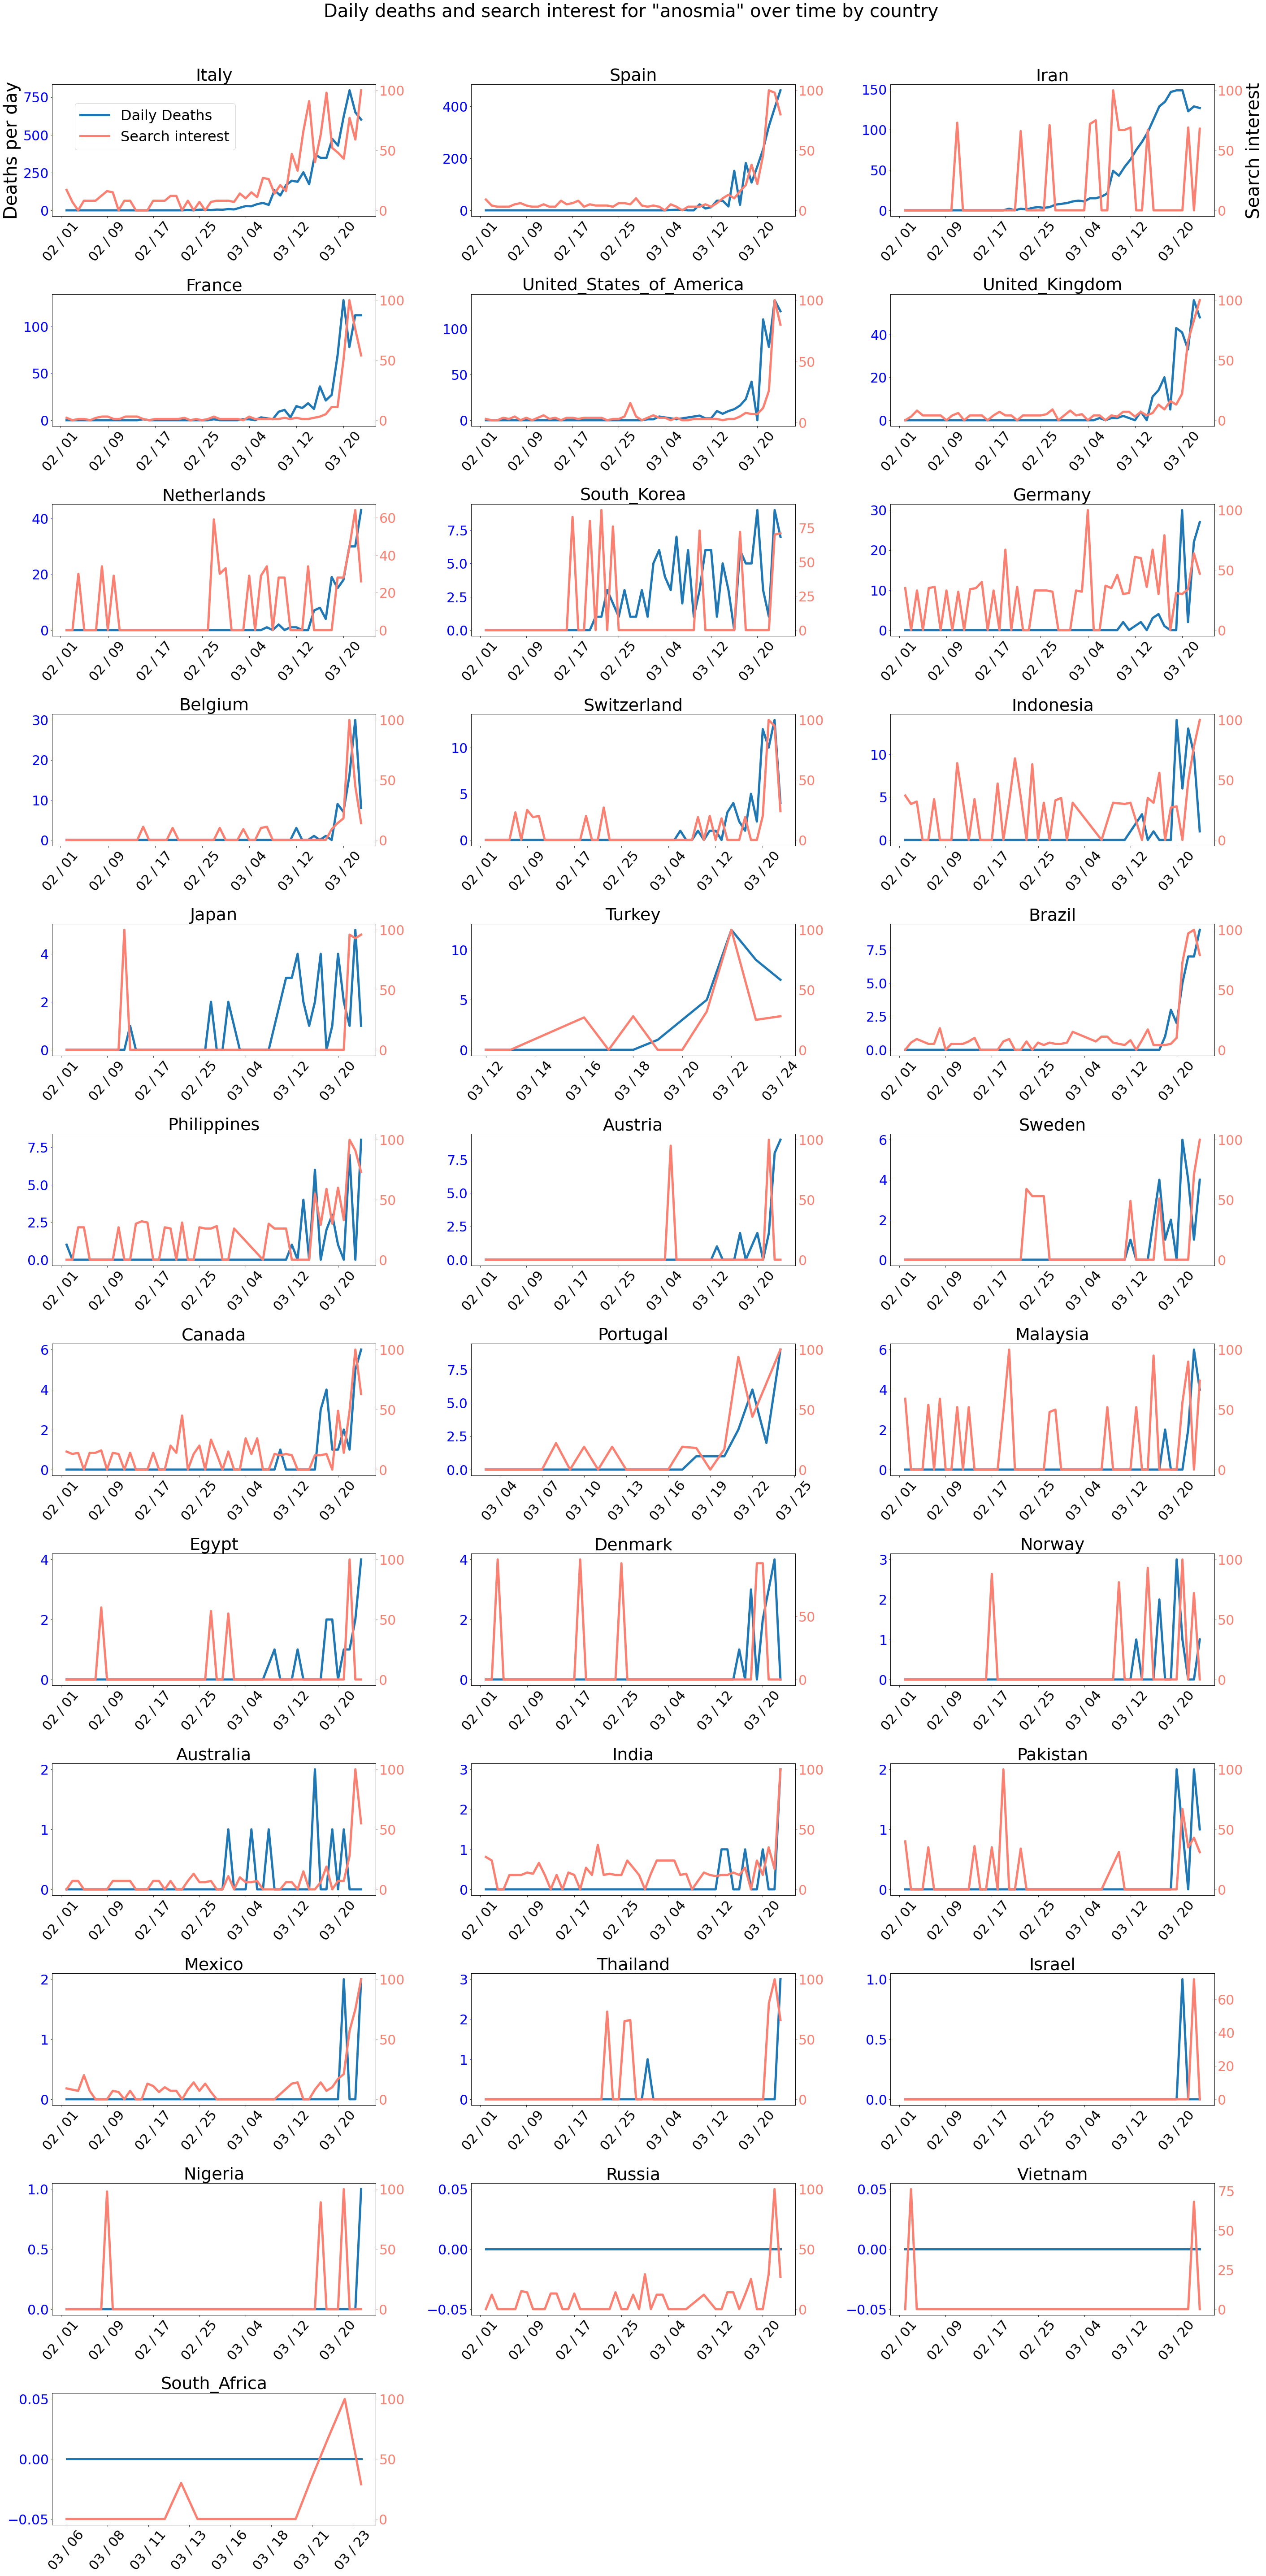

In [83]:
plot_trends()

In [11]:
def spearmans():
    df = df_final
    countries_sorted = df_final.sort_values(by='cum_sum_deaths', ascending=False)
    countries_sort_list = countries_sorted['geo_id'].unique()
    for c in countries_sort_list:
        res = stats.spearmanr(df['deaths'].loc[df['geo_id'] == c], df['trend_index'].loc[df['geo_id'] == c])
        res_correlation = round(res.correlation, 3)
        if (res.pvalue < 0.001):
            p_res = '<0.001'
        else:
            p_res = round(res.pvalue, 3)
        print(c, '    ', res_correlation, '    ', p_res)

In [12]:
spearmans()

IT      0.621      <0.001
ES      0.462      <0.001
IR      0.383      <0.001
FR      0.439      <0.001
US      0.227      0.037
GB      0.507      <0.001
NL      0.249      0.022
KR      0.132      0.227
DE      0.264      0.015
BE      0.375      <0.001
CH      0.29      0.007
ID      0.16      0.161
JP      0.263      0.015
TR      0.541      0.085
BR      0.324      0.003
PH      0.313      0.004
AT      0.239      0.028
SE      0.372      <0.001
CA      0.226      0.037
PT      0.663      <0.001
MY      0.198      0.07
EG      0.034      0.766
DK      0.034      0.759
NO      0.133      0.226
AU      0.014      0.902
IN      0.032      0.775
PK      0.315      0.004
MX      0.272      0.017
TH      0.188      0.099
IL      -0.022      0.847
NG      -0.028      0.813
RU      nan      nan
VN      nan      nan
ZA      nan      nan


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
